# Cognitive Geometry Paper
## Figure 3
Notebook to generate MDS plots to visualise cognitive geometry.  Calculate $\pi^*_\mathcal{F}$ for every combination of pairs of goals,
then calculate the symmetric adjacency matrix and run Sci-kit's MDS model to visualise the geometry in either 2D or 3D.
* grid: 11 x 11 Moore
* beta: range of values from $1 \times 10^6$ to 0.1
* data files:
    * "data-11-11-moo-liv-det-1.0-b-100-Z.pickle"
    * "data-11-11-man-liv-det-1.0-b-0.5-Z.pickle"
    * "data-11-11-moo-liv-det-1.0-b-0.3-Z.pickle"
    * "data-11-11-moo-liv-det-1.0-b-0.1-Z.pickle"

In [1]:
from utility import display as di
from utility import geometry_plots as gpl


In [2]:
import numpy as np

import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D

from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')

import networkx as nx
import pickle
import os

In [3]:
%matplotlib inline

In [4]:
try:
    os.chdir("../../../data/11-11-det" )
except OSError as err:
    print("Check directory for loading data. \nCurrent dir {}".format(os.getcwd()))



In [5]:
# extract data from pickle files
filename = "data-11-11-moo-liv-det-1.0-b-1e+08-Z.pickle"
filename = "data-11-11-moo-liv-det-1.0-b-100-Z.pickle"

# standard loop to load pickle file
with open(filename, 'rb') as infile:
    data_dict = pickle.load(infile)

env = data_dict['env'] # gridworld parameters
shape = data_dict['shape'] # shape of the grid world
theta = data_dict['theta'] # threshold for convergence
beta = data_dict['beta'] # trade-off parameter
state_dist = data_dict['state_dist'] # state distribution object used in the simulation

infos = data_dict['infos'] # decision information values
frees = data_dict['frees'] # free energy values
policies = data_dict['policies'] # corresponding free energy optimal policies


In [6]:
colour_indices = di.select_state_colours(shape)
node_colours=[di.GRAPH_CMAP(colour_indices[node])[0:3]  for node in range(env.nS)]


In [7]:
state = np.random.randint(0,1e4) # declare this now so the 2D and 3D use the same value
average_distance = gpl.calculate_symmetric_adjacency_matrix(frees)
coords_3D = gpl.get_matrix_embedding(average_distance, state=state, components=3 )
coords_2D = gpl.get_matrix_embedding(average_distance, state=state, components=2)


In [8]:
G_3D = gpl.build_embedded_graph(coords_3D, env, node_colours, components=3)

In [9]:
G_2D = gpl.build_embedded_graph(coords_2D, env, node_colours, components=2)

### Visualise Graph

In [10]:
gpl.network_plot_3D(G_3D, annotate=True)
plt.show()

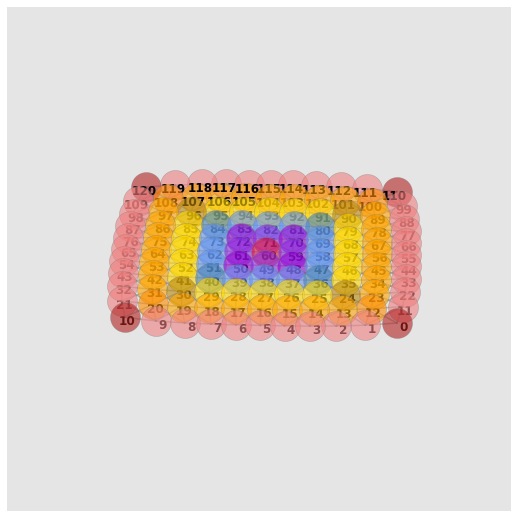

In [11]:
gpl.network_plot_3D(G_2D, annotate=True)
plt.show()

In [12]:
def plot_mapping(coords, filename=None, annotate=False):
    fig = plt.figure(figsize=(7, 7))
    ax = fig.add_subplot(projection='3d')

    ax.scatter3D(coords_3D[:,0], coords_3D[:,1], coords_3D[:,2], c=colour_indices, cmap=di.GRAPH_CMAP, s=14**2)
    scale=30
    if annotate:
        # add label to each point
        shift = max(np.max(np.max(coords)) / 50, 1)
        shift = scale / 2.8
        for j, xyz_ in enumerate(coords):
            gpl.annotate_3D(ax, string=str(j), xyz=xyz_, fontsize=8, xytext=(shift, -shift), color='grey',
                       textcoords='offset points', ha='right', va='bottom', weight='bold', zorder=15)

    # ax.set_ylabel("coordinate 1")
    # ax.set_xlabel("coordinate 2")
    # ax.set_title(title, **title_font)
    ax.margins(0.2)
    # plt.text(0.05, 0.1, label, transform=ax.transAxes, verticalalignment='top')
    if filename:
        fig.savefig(filename, bbox_inches='tight', pad_inches=0.1)
        plt.close()
    plt.show()

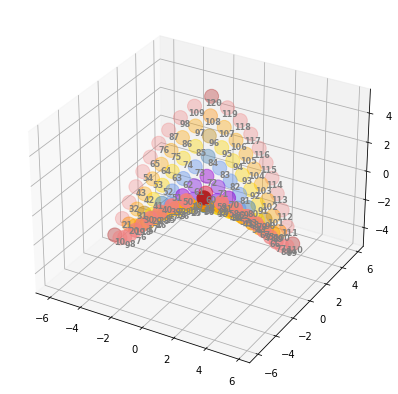

In [13]:
plot_mapping(coords_3D, annotate=True)

data-11-11-moo-liv-det-1.0-b-100-Z.pickle


<IPython.core.display.Javascript object>


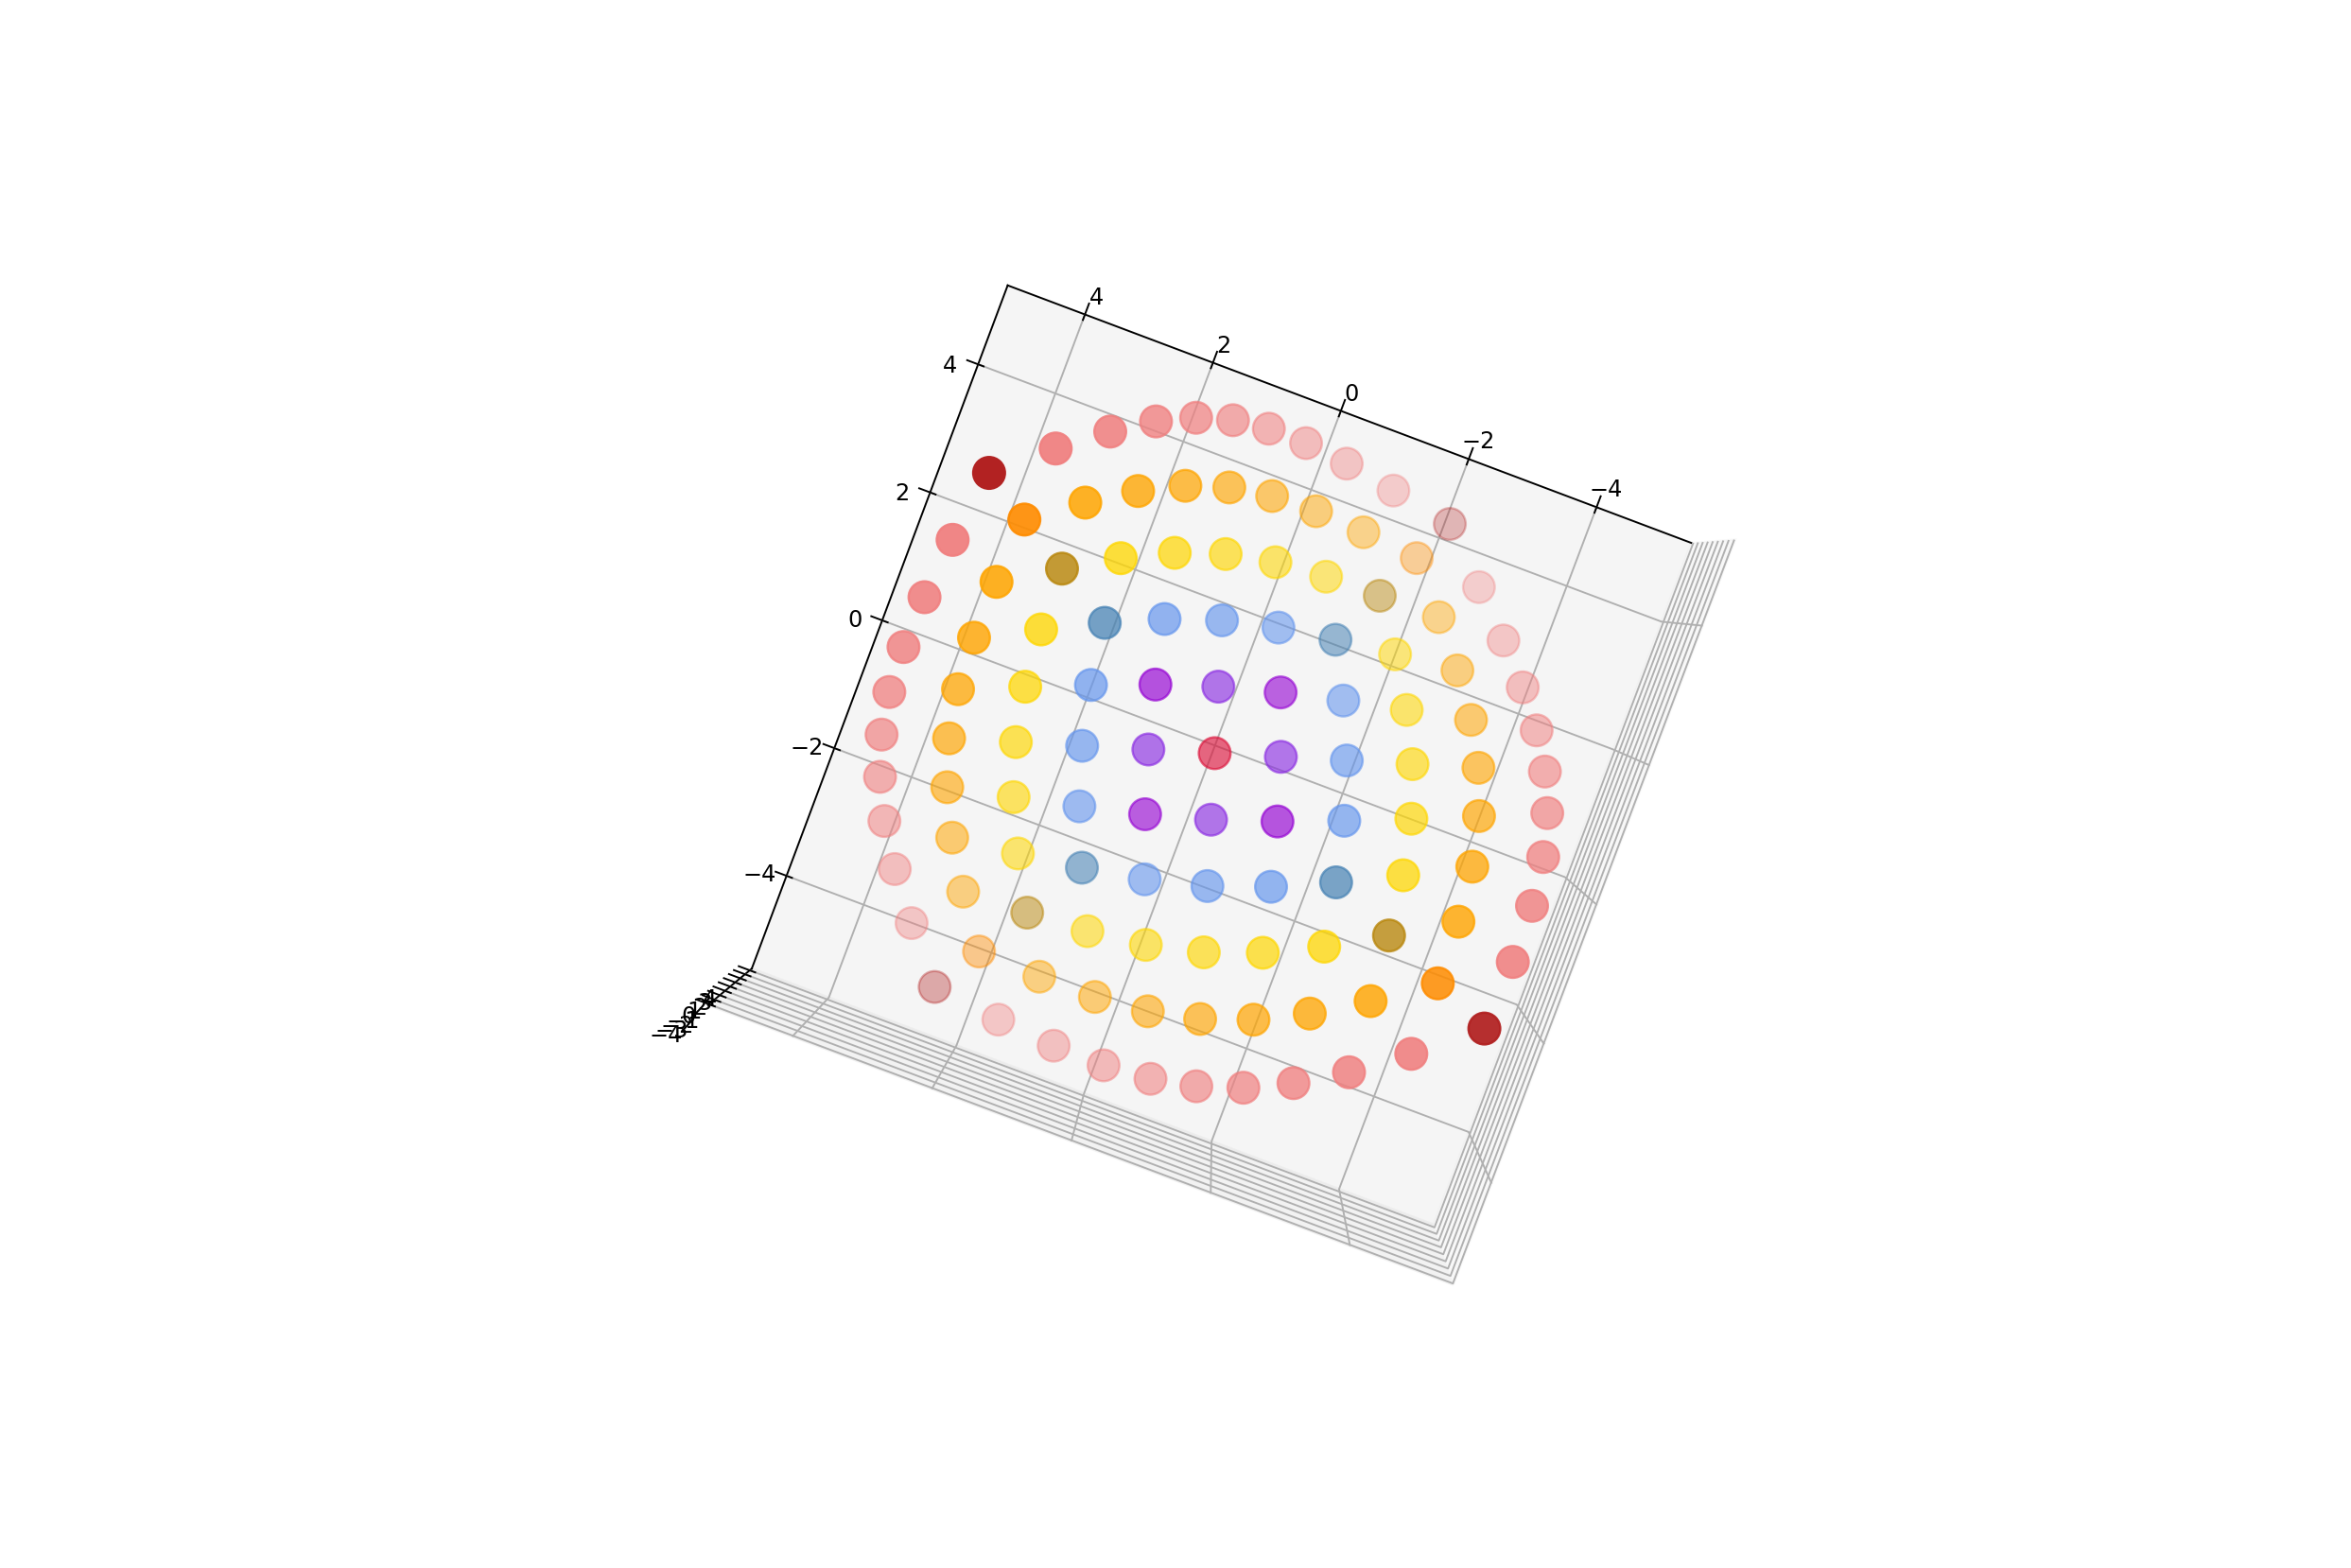

In [15]:
# you can rotate this plot by clicking and draggin the axes
%matplotlib notebook
print(filename)
ax = plt.axes(projection='3d')
ax.scatter3D(coords_3D[:,0], coords_3D[:,1], coords_3D[:,2], c=colour_indices, cmap=di.GRAPH_CMAP, s=14**2);
